<a href="https://colab.research.google.com/github/MartinVIllesca/CC6205-Procesamiento-de-Lenguaje-Natural/blob/master/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1 NLP : Competencia de Clasificación de Texto
-------------------------------


- **Nombre:** Jou-Hui Ho Ku, Martín Valderrama

- **Usuario o nombre de equipo en Codalab:** PibJou




## Objetivo e Instrucciones:

### Objetivo

Esta tarea consiste en participar en una competencia cuyo objetivo es la clasificación de tweets según su intensidad de emoción. Específicamente: 

Tendrán 4 datasets de tweets de distintas emociones: `anger`, `fear`, `sadness` y `joy`. Para cada uno de estos datasets, deberán crear un clasificador que indique la intensidad de dicha emoción en sus tweets (`low`, `medium`, `high`).

###  Fecha de Entrega: 

Por ser anunciada una vez termine el paro. Se publicará la fecha en ucursos.

### Detalles e instrucciones de la competencia:

- La competencia consiste en resolver 4 problemas de clasificación distintos, cada uno de tres clases. Por cada problema deberán crear un clasificador distinto. La evaluación de la competencia se realiza en base a 4 métricas: AUC, Kappa y Accuracy. Los mejores puntajes en cada ítem serán los que ganen.

- Para comenzar se les entregará en este notebook el baseline y la estructura del reporte. El baseline es el código que realiza creación de features y clasificación básica. Los puntajes de este serán ocupados como base para la competencia: deben superar sus resultados para ser bien evaluados.  

- Para participar, deben registrarse en Codalab y luego ingresar a la competencia usando el siguiente [link]( https://competitions.codalab.org/competitions/24121?secret_key=f5eb2d95-b36e-4aad-8fc5-4d9d77f4e4dc). 

- **Es requisito entregar el reporte con el código y haber participado en la competencia para ser evaluado.**

- Pueden hacer grupos de máximo 2 alumnos. Cada grupo debe tener un nombre de equipo (En codalab, ir a settings y después cambiar Team Name). Solo una persona debe administrar la cuenta del grupo.

- En total pueden hacer un **máximo de 4 envíos/submissions** (tanto para equipos como para envíos indivuales).

- Hagan varios experimentos haciendo cross-validation o evaluación sobre una sub-partición antes de enviar sus predicciones a Codalab. Asegúrense que la distribución de las clases sea balanceada en las particiones de training y testing. Verificar que el formato de la submission coincida con el de la competencia. De lo contrario, se les será evaluado incorrectamente.

- Estar top 5 en alguna métrica equivale a 1 punto extra en la nota final.

- No se limiten a los contenidos vistos ni a scikit ni a este baseline. ¡Usen todo su conocimiento e ingenio en mejorar sus sistemas! 

- Todas las dudas escríbanlas en el hilo de U-cursos de la tarea. Los emails que lleguen al equipo docente serán remitidos a ese medio.


### Reporte

Este debe cumplir la siguiente estructura:

1.	**Introducción**: Presentar brevemente el problema a resolver, los métodos y representaciones utilizadas en el desarrollo de la tarea y conclusiones obtenidas. (0.5 Puntos)
2.	**Representaciones**: Describir los atributos y representaciones usadas como entrada de los clasificadores. Si bien, con Bag of Words (baseline) ya se comienzan a percibir buenos resultados, pueden mejorar su evaluación agregando más atributos y representaciones diseñadas a mano. Mas abajo encontrarán una lista útil de estos que les podrá ser de utilidad. (1.5 puntos)
3.	**Algoritmos**: Describir brevemente los algoritmos de clasificación usados. (0.5 puntos)
4.	**Métricas de evaluación**: Describir brevemente las métricas utilizadas en la evaluación indicando que miden y su interpretación. (0.5 puntos)
5.	**Experimentos**: Reportar todos sus experimentos. Comparar los resultados obtenidos utilizando diferentes algoritmos y representaciones. Estos experimentos los hacen sobre la sub-partición de evaluación que deben crear (o pueden usar cross-validation). Incluyan todo el código de sus experimentos aquí. ¡Es vital haber realizado varios experimentos para sacar una buena nota! (2 puntos)
6.	**Conclusiones**: Discutir resultados, proponer trabajo futuro. (1 punto)

### Baseline

Por último, el baseline contiene un código básico que:

- Obtiene los dataset.
- Divide los datasets en train (entrenamiento y prueba) y target set (el que clasificar para subir a la competencia).
- Crea un Pipeline que: 
    - Crea features personalizadas.
    - Transforma los dataset a bag of words (BoW).  
    - Entrena un clasificador usando cada train set.
- Clasifica y evalua el sistema creado usando el test set.
- Clasifica el target set.
- Genera una submission con el target en formato zip en el directorio en donde se está ejecutando el notebook. 


Algunas pistas sobre como mejorar el rendimiento de los sistemas que creen. (Esto tendrá mas sentido cuando vean el código)

- **Vectorizador**: investigar los modulos de `nltk`, en particular, `TweetTokenizer`, `mark_negation` para reemplazar los tokenizadores. También, el parámetro `ngram_range` (Ojo que el clf naive bayes no debería usarse con n-gramas, ya que rompe el supuesto de independencia). Además, implementar los atributos que crean útiles desde el listado del el enunciado. Investigar también el vectorizador tf-idf.

- **Clasificador**: investigar otros clasificadores mas efectivos que naive bayes. Estos deben poder retornar la probabilidad de pertenecia de las clases (ie: implementar la función `predict_proba`).

- **Features**: Recuerden que pueden implementar todas las features que se les ocurra! Aquí les adjuntamos algunos ejemplos:
    -	Word n-grams.
    -	Character n-grams. 
    -	Part-of-speech tags.
    -	Sentiment Lexicons (Lexicon = A set of words with a label or associated value.).
        - Count the number of positive and negative words within a sentence.
        - If the lexicon has associated intensity of feeling (for example in a decimal), then take the average of the intensity of the sentence according to the feeling, the sum, etc.
        -	A good lexicon of sentiment: [Bing Liu](http://www.cs.uic.edu/~liub/FBS/opinion-lexicon-English.rar) 
        - A reference with a lot of [sentiment lexicons](https://medium.com/@datamonsters/sentiment-analysis-tools-overview-part-1-positive-and-negative-words-databases-ae35431a470c). 
    -	The number of elongated words (words with one character repeated more than two times).
    -	The number of words with all characters in uppercase.
    -	The presence and the number of positive or negative emoticons.
    -	The number of individual negations.
    -	The number of contiguous sequences of dots, question marks and exclamation marks.
    -	Word Embeddings: Here are some good ideas on how to use them.
    https://stats.stackexchange.com/questions/221715/apply-word-embeddings-to-entire-document-to-get-a-feature-vector

- **Reducción de dimensionalidad**: También puede serles de ayuda. Referencias [aquí](https://scikit-learn.org/stable/modules/unsupervised_reduction.html).

- Por último, pueden encontrar mas referencias de cómo mejorar sus features, el vectorizador y el clasificador [aquí](https://affectivetweets.cms.waikato.ac.nz/benchmark/).

(Pueden eliminar cualquier celda con instrucciones...)

**Importante**: Recuerden poner su nombre y el de su usuario o de equipo (en caso de que aplique) tanto en el reporte. NO serán evaluados Notebooks sin nombre.

----------------------------------------

(borrar este bloque despues)
1.	**Introducción**: Presentar brevemente el problema a resolver, los métodos y representaciones utilizadas en el desarrollo de la tarea y conclusiones obtenidas. (0.5 Puntos)
2.	**Representaciones**: Describir los atributos y representaciones usadas como entrada de los clasificadores. Si bien, con Bag of Words (baseline) ya se comienzan a percibir buenos resultados, pueden mejorar su evaluación agregando más atributos y representaciones diseñadas a mano. Mas abajo encontrarán una lista útil de estos que les podrá ser de utilidad. (1.5 puntos)
3.	**Algoritmos**: Describir brevemente los algoritmos de clasificación usados. (0.5 puntos)
4.	**Métricas de evaluación**: Describir brevemente las métricas utilizadas en la evaluación indicando que miden y su interpretación. (0.5 puntos)
5.	**Experimentos**: Reportar todos sus experimentos. Comparar los resultados obtenidos utilizando diferentes algoritmos y representaciones. Estos experimentos los hacen sobre la sub-partición de evaluación que deben crear (o pueden usar cross-validation). Incluyan todo el código de sus experimentos aquí. ¡Es vital haber realizado varios experimentos para sacar una buena nota! (2 puntos)
6.	**Conclusiones**: Discutir resultados, proponer trabajo futuro. (1 punto)

## 1. Introducción

El problema a abordar en este trabajo es el análisis de sentimientos de tweets. Se tiene un dataset de tweets clasificados por sentimiento (joy, fear, sadness, anger), y en cada sentimiento, a su vez, los tweets se clasifican por intensidad (alto, medio o bajo).

Para resolver este problema, se utilizan distintas representaciones de los datos, tales como Bag Of Words, la representación Tf-Idf, Word Embeddings, y también se extraen características relevantes de los textos, como por ejemplo la cantidad de signos de exclamación que contengan.

Una vez convertidos los textos a su representación, se utilizan métodos de NaiveBayes, SVM, regresión logística y MLP para clasificar el nivel de sentimiento en cada clase.

Para realizar tal tarea, se sigue el código entregado por el cuerpo docente a modo de marco de trabajo. En este se realiza la carga de datos, la creación de las transformaciones de los datos y la creación de los clasificadores, todo en utilizando las facultades de la librería sklearn con pipeline y feature union.

Se realizan múltiples experimentos para obtener los modelos que mejor clasifiquen a los tweets y con ello después realizar una predicción sobre el conjunto de testeo que después es subido a la competencia de codalab.

Con esta tarea se pretende abordar la metodología de trabajo para participar en competencias de Data Science donde se deben crear múltiples instancias de extracción de características y creación de clasificadores. Además, se deben aplicar los conocimientos adquiridos en el curso de Procesamiento de Lenguaje Natural para obtener los mejores rendimientos.

## 2. Representaciones

Se implementan distintas representaciones de los textos, mediante las siguientes clases:

   
- **CountVectorizer** \
    Consiste en una representación de los textos en Bag of Words.
    
- **TfidfVectorizer**\
    Calcula la matriz Tf-Idf asociada al dataset. El algoritmo funciona sobre un tokenizer el cual por defecto se realiza separando solamente las palabras del tweet en este caso. Se puede utilizar con distintos Tokenizers, en esta tarea se prueba un caso con el TweetTokenizer de la librería nltk.
    
- **TweetTokenizer**\
    Es un tokenizer pre-definido de la librería nltk, el cual reconoce carácteres especiales de los mensajes de Twitter como emojis en símbolos o puntutación, incluso hashtags.
    

- **CharCountTransformer**: \
    Esta representación considera una serie de conteos "manuales" implementados a continuación. Esta incluye:
    - **Caracteres relevantes dentro del texto**, tales como:
        - Cantidad de signos de exclamación
        - Cantidad de signos de interrogación
        - Cantidad de letras repetidas más de tres veces
        - Cantidad de letras en mayúscula
        - Cantidad de puntos seguidos 
    - Se utiliza la librería _emoji_ para codificar los emojis de los tweets, y la librería _emosent_ para extraer un sentiment score del emoji, además de la polaridad del sentimiento. Cabe destacar que existen algunos emojis que no están en la librería _emosent_, por lo que fue necesario evaluar su polaridad bajo inspección, y evaluar si el nombre del emoji contiene palabras positivas o negativas.
    - Además, se marcan previamente las palabras que siguen a una negación, concatenando el string \_NEG luego de la palabra, para que sea considerada diferente a la misma palabra, pero en un contexto positivo.
 
- **Doc2VecTransformer** \
    Word embeddings con el modelo _glove_twitter_ ya entrenado. Se considera el máximo de cada tweet, considerando que se quiere realizar un análisis de sentimientos, y otras operaciones como suma o promedio podrían causar una pérdida de información.
    
- **LiuFeatureExtractor**\
    Extrae la cantidad de palabras positivas y palabras negativas, usando el dataset de Bing Liu.

- **VaderFeatureExtractor**\
    https://github.com/cjhutto/vaderSentiment

## 3. Algoritmos

Los algoritmos utilizados en este trabajo son:

- **Naive Bayes** es un algoritmo de búsqueda de pertenencia a una clase dada de acuerdo al contenido del documento. Compara las palabras presentes en el documento con las presentes en el vocabulario pertenenciente a la clase, obteniendo la verosimilitud de que dicho documento pertenezca a dicha clase. Compara cada una de las probabilidades para obtener la pertenencia.

- **SVM** es un clasificador basado en vectores de soporte, son los que determinan el margen entre dos clases. La forma de separar las clases es maximizando el margen de la clase con el resto de los datos, esto con la aproximación del hiperplano de separación.

- **Logistic Regression** 

- **MLP Classifier** es un clasificador basado en redes neuronales totalmente conectadas, puede tener múltiples capas ocultas, mientras más neuronas tenga el clasificador, más parámetros tendrá que entrenar con backpropagation.

## 4. Métricas de Evaluación

- AUC: es una métrica que mide la capacidad del modelo de distinguir entre clases variando el threshold de separación, es decir, la probabilidad con la que se considera la pertenencia a una clase. En la imagen inferior obtenida de [towardsdatascience.com](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5), se muestra una separación entre las distribuciones de probabilidad de cada clase y la ROC resultante al mover el threshold.

- Kappa: El coeficiente Cohen's Kappa es un estadístico de la capacidad del modelo de "estar de acuerdo" con otro anotador o clasificador, en este caso, con el anotador de los labels que consideramos reales. El coeficiente de Kappa se calcula como:

$$K = \frac{0A - AC}{1 - AC}$$

Donde $0A$ es el accuracy obtenido, y $AC$ es la probabilida de haberle acertado por coincidencia. Un coeficiente de Cohen Kappa superior a 0.8 indica un buen rendimiento del modelo sobre haberle acertado por coincidencia. Mientras que un coeficiente inferior o negativo, indica un mal rendimiento del modelo.

- Accuracy: El accuracy es el coeficiente de evaluación más usado para evaluar a un modelo. Con él se calcula el nivel de acuerdo que tiene el modelo con los labels considerados reales, se calcula como la suma de la diagonal de la matriz de confusión sobre el total de las muestras consideradas en la evaluación. Mientras más cercano a 1 quire decir que el modelo se parece más a los labels considerados reales, mientras que un accuracy 0, quiere decir que el modelo no pudo predecir correctamente ninguna etiqueta.


## 5. Experimentos

...

### Importar librerías y utiles

In [1]:
import pandas as pd
import os
import numpy as np
import shutil

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import confusion_matrix, cohen_kappa_score, classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.tokenize import TweetTokenizer
from nltk.sentiment.util import mark_negation
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import opinion_lexicon, stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

# !pip install -U emojis
# !pip install emosent-py
# !pip install emoji --upgrade
import emoji
import emojis
from emosent import get_emoji_sentiment_rank

import gensim.downloader as api
import string

from collections import Counter

In [2]:
import nltk
# nltk.download('opinion_lexicon')
# nltk.download('vader_lexicon')
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

In [3]:
# !pip install -U textblob
# !python -m textblob.download_corpora
from textblob import TextBlob 

In [4]:
negative_words = pd.read_csv('https://raw.githubusercontent.com/MartinVIllesca/CC6205-Procesamiento-de-Lenguaje-Natural/master/data_t1/opinion-lexicon-English/negative-words.csv',
                             sep='\n', header=None, error_bad_lines=False)
positive_words = pd.read_csv('https://raw.githubusercontent.com/MartinVIllesca/CC6205-Procesamiento-de-Lenguaje-Natural/master/data_t1/opinion-lexicon-English/positive-words.csv',
                             sep='\n', header=None, error_bad_lines=False)

positive_words = np.hstack((list(positive_words),
                            'hugging_face',
                            'popcorn'))
negative_words = np.hstack((list(negative_words),
                            'spider',
                            'face_with_head-bandage',
                            'upside-down_face',
                            'face_with_rolling_eyes',
                            'zipper-mouth_face',
                            'slightly_frowning_face'))

In [5]:
# limpiar puntuaciones y separar por tokens.
punctuation = string.punctuation + "«»“”‘’…—"
stopwords = pd.read_csv(
    'https://raw.githubusercontent.com/Alir3z4/stop-words/master/english.txt'
).values
stopwords = Counter(stopwords.flatten().tolist())

In [6]:
# Doc2Vec Model
glove_twitter = api.load("glove-twitter-25")  # download the model and return as object ready for use
# glove_twitter.most_similar("cat")

stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer() 

6631 | INFO | loading projection weights from /home/martin/gensim-data/glove-twitter-25/glove-twitter-25.gz
6631 | INFO | loaded (1193514, 25) matrix from /home/martin/gensim-data/glove-twitter-25/glove-twitter-25.gz


### Definir métodos de evaluación

Estas funciones están a cargo de evaluar los resultados de la tarea. No deberían cambiarlas.


In [7]:
def auc_score(test_set, predicted_set):
    high_predicted = np.array([prediction[2] for prediction in predicted_set])
    medium_predicted = np.array(
        [prediction[1] for prediction in predicted_set])
    low_predicted = np.array([prediction[0] for prediction in predicted_set])
    high_test = np.where(test_set == 'high', 1.0, 0.0)
    medium_test = np.where(test_set == 'medium', 1.0, 0.0)
    low_test = np.where(test_set == 'low', 1.0, 0.0)
    auc_high = roc_auc_score(high_test, high_predicted)
    auc_med = roc_auc_score(medium_test, medium_predicted)
    auc_low = roc_auc_score(low_test, low_predicted)
    auc_w = (low_test.sum() * auc_low + medium_test.sum() * auc_med +
             high_test.sum() * auc_high) / (
                 low_test.sum() + medium_test.sum() + high_test.sum())
    return auc_w


def evaluate(predicted_probabilities, y_test, labels, dataset_name):
    # Importante: al transformar los arreglos de probabilidad a clases,
    # entregar el arreglo de clases aprendido por el clasificador.
    # (que comunmente, es distinto a ['low', 'medium', 'high'])
    predicted_labels = [
        labels[np.argmax(item)] for item in predicted_probabilities
    ]
    print('Confusion Matrix for {}:\n'.format(dataset_name))
    print(
        confusion_matrix(y_test,
                         predicted_labels,
                         labels=['low', 'medium', 'high']))

#     print('\nClassification Report:\n')
#     print(
#         classification_report(y_test,
#                               predicted_labels,
#                               labels=['low', 'medium', 'high']))
    # Reorder predicted probabilities array.
    labels = labels.tolist()
    predicted_probabilities = predicted_probabilities[:, [
        labels.index('low'),
        labels.index('medium'),
        labels.index('high')
    ]]
    auc = round(auc_score(y_test, predicted_probabilities), 3)
    print("Scores:\n\nAUC: ", auc, end='\t')
    kappa = round(cohen_kappa_score(y_test, predicted_labels), 3)
    print("Kappa:", kappa, end='\t')
    accuracy = round(accuracy_score(y_test, predicted_labels), 3)
    print("Accuracy:", accuracy)
    print('------------------------------------------------------\n')
    return np.array([auc, kappa, accuracy])

### Datos

Obtener los datasets desde el github del curso

In [8]:
# Datasets de entrenamiento.
train = {
    'anger': pd.read_csv('https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/assignment_1/data/train/anger-train.txt', sep='\t', names=['id', 'tweet', 'class', 'sentiment_intensity']),
    'fear': pd.read_csv('https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/assignment_1/data/train/fear-train.txt', sep='\t', names=['id', 'tweet', 'class', 'sentiment_intensity']),
    'joy': pd.read_csv('https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/assignment_1/data/train/joy-train.txt', sep='\t', names=['id', 'tweet', 'class', 'sentiment_intensity']),
    'sadness': pd.read_csv('https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/assignment_1/data/train/sadness-train.txt', sep='\t', names=['id', 'tweet', 'class', 'sentiment_intensity'])
}
# Datasets que deberán predecir para la competencia.
target = {
    'anger': pd.read_csv('https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/assignment_1/data/target/anger-target.txt', sep='\t', names=['id', 'tweet', 'class', 'sentiment_intensity'], na_values=['NONE']),
    'fear': pd.read_csv('https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/assignment_1/data/target/fear-target.txt', sep='\t', names=['id', 'tweet', 'class', 'sentiment_intensity'], na_values=['NONE']),
    'joy': pd.read_csv('https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/assignment_1/data/target/joy-target.txt', sep='\t', names=['id', 'tweet', 'class', 'sentiment_intensity'], na_values=['NONE']),
    'sadness': pd.read_csv('https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/assignment_1/data/target/sadness-target.txt', sep='\t', names=['id', 'tweet', 'class', 'sentiment_intensity'], na_values=['NONE'])
}

In [9]:
# Ejemplo de algunas filas aleatorias:
low_len, med_len, high_len = [], [], []
for index, row in train['fear'].iterrows():
    if row.sentiment_intensity=='low':
        low_len.append(len(row.tweet))
    if row.sentiment_intensity=='medium':
        med_len.append(len(row.tweet))
    if row.sentiment_intensity=='high':
        high_len.append(len(row.tweet))

In [10]:
import matplotlib.pyplot as plt

(array([12., 21., 23., 31., 28., 26., 27., 23., 38., 59.]),
 array([ 11. ,  24.3,  37.6,  50.9,  64.2,  77.5,  90.8, 104.1, 117.4,
        130.7, 144. ]),
 <a list of 10 Patch objects>)

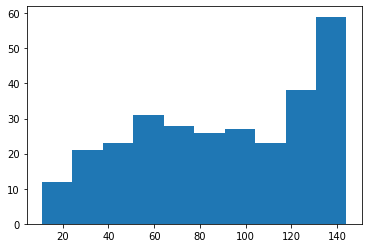

In [11]:
plt.hist(low_len)


(array([ 14.,  36.,  43.,  60.,  55.,  80.,  50.,  80., 174., 107.]),
 array([ 10. ,  24.2,  38.4,  52.6,  66.8,  81. ,  95.2, 109.4, 123.6,
        137.8, 152. ]),
 <a list of 10 Patch objects>)

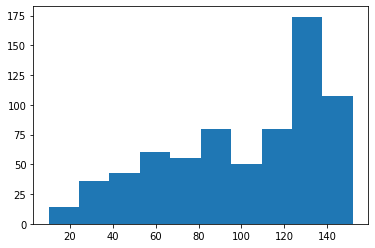

In [12]:
plt.hist(med_len)

(array([ 4., 18., 21., 27., 28., 27., 29., 24., 60., 32.]),
 array([ 14. ,  27.8,  41.6,  55.4,  69.2,  83. ,  96.8, 110.6, 124.4,
        138.2, 152. ]),
 <a list of 10 Patch objects>)

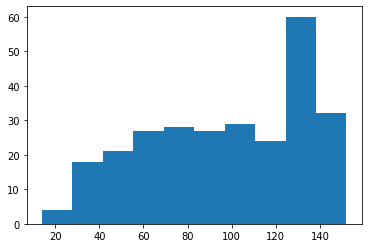

In [13]:
plt.hist(high_len)

### Analizar los datos 

Imprimir la cantidad de tweets de cada dataset, según su intensidad de sentimiento. Noten que las clases están desbalanceadas. 

In [14]:
def get_group_dist(group_name, train):
    print(group_name, "\n",
          train[group_name].groupby('sentiment_intensity').count(),
          '\n---------------------------------------\n')
for dataset_name in train:
    get_group_dist(dataset_name, train)

anger 
                       id  tweet  class
sentiment_intensity                   
high                 163    163    163
low                  161    161    161
medium               617    617    617 
---------------------------------------

fear 
                       id  tweet  class
sentiment_intensity                   
high                 270    270    270
low                  288    288    288
medium               699    699    699 
---------------------------------------

joy 
                       id  tweet  class
sentiment_intensity                   
high                 195    195    195
low                  219    219    219
medium               488    488    488 
---------------------------------------

sadness 
                       id  tweet  class
sentiment_intensity                   
high                 197    197    197
low                  210    210    210
medium               453    453    453 
---------------------------------------



### Custom Features 

Para crear features personalizadas implementaremos nuestros propios Transformers (estandar de scikit para crear nuevas features entre otras cosas). Para esto:

1. Creamos nuestra clase Transformer extendiendo BaseEstimator y TransformerMixin. En este ejemplo, definiremos `CharsCountTransformer` que cuenta carácteres relevantes ('!', '?', '#') en los tweets.
2. Definios una función cómo `get_relevant_chars` que opera por cada tweet y retorna un arreglo.
3. Hacemos un override de la función `transform` en donde iteramos por cada tweet, llamamos a la función que hicimos antes y agregamos sus resultados a un arrelo. Finalmente lo retornamos.

Esto nos facilitará el trabajo mas adelante. Una Guia completa de las transformaciones predefinidas en scikit pueden encontrarla [aquí](https://scikit-learn.org/stable/data_transforms.html).



In [15]:
class BasicModelArchitecture:
    """
    Basic architecture of transformer classes, contains fit method.
    """
    def fit(self, X, y=None):
        """
        Returns `self` unless something different happens in train and test.
        """
        return self

In [16]:
class CharsCountTransformer(BaseEstimator, TransformerMixin, BasicModelArchitecture):
    """
    Count relevant chars, emojis, repeated chars and dots, and do mark_negation.
    """
    def __init(self):
        super(CharsCountTransformer, self).__init__()
    
    def get_relevant_chars(self, tweet):
        num_hashtags = tweet.count('#')
        num_exclamations = tweet.count('!')
        num_interrogations = tweet.count('?')
        num_uppercases = sum(1 for c in tweet if c.isupper())  
        num_repeated_chars = self.count_repeated_chars(tweet)
        num_repeated_dots = self.count_repeated_dots(tweet)
        len_tweet = len(tweet)
        
        return [num_hashtags, num_exclamations, num_interrogations,
                num_uppercases, num_repeated_chars, num_repeated_dots, len_tweet]
    
    def get_emojis(self, tweet):
        """
        Get number, sentiment_score, and polarity of emojis.
        """
        emojis_list = [c for c in tweet if c in emoji.UNICODE_EMOJI]
        positive, negative, neutral, sent_score, type_pos, type_neg = 0, 0, 0, 0, 0, 0
        no_pesca = 0
        
        for emoj in emojis_list:
            try:
                em = get_emoji_sentiment_rank(emoj)
#                 positive += em['positive']
#                 negative += em['negative']
#                 neutral += em['neutral']
                sent_score += abs(em['sentiment_score'])
                if em['sentiment_score']>0:
                    type_pos += 1
                else:
                    type_neg += 1
                    
            except:  
                emoji_name = emoji.UNICODE_EMOJI.get(emoj)[1:-1]
                if emoji_name in positive_words:
                    type_pos += 1
                    continue
                elif emoji_name in negative_words:
                    type_neg += 1
                    continue
                else:
                    # Evaluate by words
                    for idx, w in enumerate(emoji_name.split('_')):
                        if w in positive_words:
                            type_pos += 1
                            break
                        elif w in negative_words:
                            type_neg += 1
                            break
        return [len(emojis_list), sent_score, type_pos, type_neg]

    def neg_transform(self, X):
        """
        Append '_NEG' to all words after a negation.
        """
        converted = []
        counter = []
        for tweet in X:
            neg = mark_negation(tweet.split(' '))
            count = sum(1 for word in neg if neg[-4:]=='_NEG')
            sentence = ' '.join(word for word in neg)
            converted.append(sentence)
            counter.append(count)
        return count, converted
    
    def count_repeated_chars(self, tweet):
        """
        Count number of more than twice repeated chars ( >= three times).
        """
        c_prev = tweet[0]
        counter = 0
        twice = False
        for c in tweet[1:]:
            if c==c_prev:
                if twice:
                    counter += 1
                twice = True
            else:
                twice = False
            c_prev = c
        return counter
    
    def count_repeated_dots(self, tweet):
        """
        Count number of contiguous dots.
        """
        counter = 0
        prev_is_dot = False
        for c in tweet[1:]:
            if c == '.':
                if prev_is_dot:
                    counter += 1
                else:
                    prev_is_dot = True
            else:
                prev_is_dot = False
        return counter
    
    def transform(self, X, y=None):
        chars = []
        num_negs, X_neg = self.neg_transform(X)
        for tweet in X_neg:
            features = np.hstack((self.get_relevant_chars(tweet),
                                  self.get_emojis(tweet),
                                  num_negs))
            chars.append(features)
        return np.array(chars)

In [17]:
class LiuFeatureExtractor(BaseEstimator, TransformerMixin, BasicModelArchitecture):
    """
    Takes in a corpus of tweets and calculates features using Bing Liu's lexicon.
    """

    def __init__(self, tokenizer):
        super(LiuFeatureExtractor, self).__init__()
        self.tokenizer = tokenizer
        self.pos_set = set(opinion_lexicon.positive())
        self.neg_set = set(opinion_lexicon.negative())

    def liu_score(self,sentence):
        """
        Calculates the number of positive and negative words in the sentence using Bing Liu's Lexicon.
        """ 
        tokenized_sent = self.tokenizer.tokenize(sentence)
        pos_words = 0
        neg_words = 0
        for word in tokenized_sent:
            if word in self.pos_set:
                pos_words += 1
            elif word in self.neg_set:
                neg_words += 1
        return [pos_words,neg_words]

    def transform(self, X, y=None):
        """
        Applies liu_score on a data.frame containing tweets.
        """
        values = []
        for tweet in X:
            values.append(self.liu_score(tweet))

        return(np.array(values))

In [18]:
class VaderFeatureExtractor(BaseEstimator, TransformerMixin, BasicModelArchitecture):
    """
    Takes in a corpus of tweets and calculates features using the Vader method.
    """

    def __init__(self):
        super(VaderFeatureExtractor, self).__init__()
        self.sid = nltk.sentiment.SentimentIntensityAnalyzer()

    def transform(self, X, y=None):
        """
        Calculates sentiment scores for a sentence using the Vader method.
        """
        values = []
        for tweet in X:
            values.append(list(self.sid.polarity_scores(tweet).values()))

        return(np.array(values))

In [19]:
nl_analyser = nltk.sentiment.SentimentIntensityAnalyzer()
nl_analyser.polarity_scores(':(')

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4404}

In [20]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [21]:
analyser.polarity_scores('i am not happy')

{'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound': -0.4585}

In [22]:
VaderFeatureExtractor().transform(['i am happy happy happy', 'happy happy'])

array([[0.    , 0.083 , 0.917 , 0.9022],
       [0.    , 0.    , 1.    , 0.8126]])

In [23]:
class TextBlobTransformer(BaseEstimator, TransformerMixin, BasicModelArchitecture):
    """
    Sentiment Analysis using TextBlob.
    """
    def __init__ (self):
        super(TextBlobTransformer, self).__init__()
    
    def transform(self, X, y=None):
        sent_pol = [TextBlob(doc).sentiment.polarity for doc in X]
        return np.array([sent_pol]).T

## Doc2Vec

In [25]:
class Doc2VecTransformer(BaseEstimator, TransformerMixin, BasicModelArchitecture):
    """ Transforma tweets a representaciones vectoriales usando algún modelo de Word Embeddings.
    """
    
    def __init__(self, model, aggregation_func, tokenizer, do_stem=False, do_lemmatize=False,
                 remove_stopwords=False):
        # extraemos los embeddings desde el objeto contenedor. ojo con esta parte.
        self.model = model.wv 
        self.tokenizer = tokenizer
        self.remove_stopwords = remove_stopwords
        self.do_stem = do_stem
        self.do_lemmatize = do_lemmatize
        
        # indicamos la función de agregación (np.min, np.max, np.mean, np.sum, ...)
        self.aggregation_func = aggregation_func

    def simple_tokenizer(self, doc, remove_stopwords=False, lower=False):
        """Tokenizador. Elimina signos de puntuación, lleva las letras a minúscula(opcional) y 
           separa el tweet por espacios.
        """
        tokens = self.tokenizer.tokenize(doc)
        final_tokens = []
        for t in tokens:
            try:
                if t[0]=='#':  # Convert hashtags
                    t = t[1:]
            except:
                print('Except', doc)
            if remove_stopwords:
                if t.lower() in stopwords:
                    continue
            final_tokens.append(t)
        
        return final_tokens
    
    def stem(self, doc):  
        doc = stemmer.stem(doc)
        return doc
    
    def lemmatize(self, doc):
        
        doc = lemmatizer.lemmatize(doc)
        return doc
        
    def transform(self, X, y=None):
        
        doc_embeddings = []
        no_embeddings = False
        for doc in X:
            
            tokens = self.simple_tokenizer(doc, self.remove_stopwords) 
    
            selected_wv = []
            for token in tokens:
                token = token.lower()
                
                # Stem or lemmatize
                if self.do_stem:
                    token = self.stem(token)
                elif self.do_lemmatize:
                    token = self.lemmatize(token)
                
                if token in self.model.vocab:
                    selected_wv.append(self.model[token])
                    
            # si seleccionamos por lo menos un embedding para el tweet, lo agregamos y luego lo añadimos.
            if len(selected_wv) > 0:
#                 doc_embedding = self.aggregation_func(np.array(selected_wv), axis=0)
                doc_embedding += np.array(selected_wv)
                doc_embeddings.append(doc_embedding)
            # si no, añadimos un vector de ceros que represente a ese documento.
            else: 
                if not no_embeddings:
                    print('Couldnt find any embedding for tweet:')
                    no_embeddings = True
                print(doc)
                doc_embeddings.append(np.zeros(self.model.vector_size)) # la dimension del modelo 

        return np.array(doc_embeddings)

### Definir la representación y el clasificador

Para esto, definiremos Pipelines. Un `Pipeline` es una lista de transformaciones y un estimador(clasificador) ubicado al final el cual define el flujo que seguiran nuestros datos dentro del sistema que creemos. Nos permite ejecutar facilmente el mismo proceso sobre todos los datasets que usemos, simplificando así nuestra programación.

El pipeline más básico que podemos hacer es transformar el dataset a Bag of Words y después usar clasificar el BoW usando NaiveBayes:

```python
    Pipeline([('bow', CountVectorizer()), ('clf', MultinomialNB())])
```


Ahora, si queremos usar nuestra transformación para agregar las features que creamos, usaremos `FeatureUnion`. Esta simplemente concatenará los vectores resultantes de ejecutar BoW y los Transformer en un solo vector.

```python
    Pipeline([('features',FeatureUnion([('bow', CountVectorizer()),
                                        ('chars_count',CharsCountTransformer())])),
              ('clf', MultinomialNB())])

```





Recuerden que cada pipeline representa un sistema de clasificación distinto. Por lo mismo, deben instanciar uno por cada problema que resuelvan. De lo contrario, podrían solapar resultados.  Para esto, les recomendamos crear los pipeline en distintas funciones, como la siguiente:

In [26]:
count = CountVectorizer(tokenizer=TweetTokenizer().tokenize,
                        ngram_range=(1, 4))

tfidf = TfidfVectorizer(tokenizer=TweetTokenizer().tokenize)

chars_count = CharsCountTransformer()

# doc2vec_mean = Doc2VecTransformer(glove_twitter, np.mean)
# doc2vec_sum = Doc2VecTransformer(glove_twitter, np.sum, TweetTokenizer())
doc2vec_max_remove_stop = Doc2VecTransformer(glove_twitter, np.max, TweetTokenizer(), remove_stopwords=True)
doc2vec_max = Doc2VecTransformer(glove_twitter, np.max, TweetTokenizer())
doc2vec_min = Doc2VecTransformer(glove_twitter, np.min, TweetTokenizer())

doc2vec_max_stem = Doc2VecTransformer(glove_twitter, np.max, TweetTokenizer(), do_stem=True)
doc2vec_max_lem = Doc2VecTransformer(glove_twitter, np.max, TweetTokenizer(), do_lemmatize=True)

liu = LiuFeatureExtractor(tokenizer=TweetTokenizer())
vader = VaderFeatureExtractor()
textblob = TextBlobTransformer()

<ipython-input-25-5b3e502dfb57>:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  self.model = model.wv


In [27]:
def get_experiment_0_pipeline():
    """
    CountVectorizer + CharsCountTransformer + NB
    """
    return Pipeline([('features',
                      FeatureUnion([('bow', count),
                                    ('chars_count', chars_count)
                                    ])), ('clf', MultinomialNB())])

In [28]:
def get_experiment_01_pipeline():
    """
    CountVectorizer + CharsCountTransformer + NB
    """
    return Pipeline([('features',
                      FeatureUnion([('bow', count),
                                    ('chars_count', chars_count)
                                    ])), ('clf', LogisticRegression(solver='liblinear',multi_class='ovr'))])

In [29]:
def get_experiment_1_pipeline():
    """
    CountVectorizer + TweetTokenizer + CharsCountTransformer + NB
    """
    return Pipeline([('features',
                      FeatureUnion([('bow', count),
                                    ('chars_count', chars_count)
                                    ])), ('clf', LogisticRegression(solver='liblinear',multi_class='ovr'))])

In [30]:
def get_experiment_2_pipeline():
    """
    CountVectorizer + TweetTokenizer + NB
    """
    return Pipeline([('features',
                      FeatureUnion([('bow', count)])),
                     ('clf', MLPClassifier(hidden_layer_sizes=(30)))])

In [31]:
def get_experiment_21_pipeline():
    """
    CountVectorizer + TweetTokenizer + NB
    """
    return Pipeline([('features',
                      FeatureUnion([('bow', count)])),
                     ('clf', LogisticRegression(solver='liblinear',multi_class='ovr'))])

In [32]:
def get_experiment_4_pipeline():
    """
    TfidfVectorizer + TweetTokenizer + CharsCountTransformer + NB
    """
    return Pipeline([('features',
                      FeatureUnion([('tf-idf', tfidf),
                                    ('chars_count', chars_count)])),
                     ('clf', LogisticRegression(solver='liblinear',multi_class='ovr'))])

In [33]:
def get_experiment_5_pipeline():
    """
    TfidfVectorizer + TweetTokenizer + Doc2Vec (removing stopwords) + SVM
    """
    return Pipeline([('features',
                      FeatureUnion([('tf-idf', tfidf),
                                    ('doc2vec', doc2vec_max_remove_stop)])),
                     ('clf', LogisticRegression(solver='liblinear',multi_class='ovr'))])

In [34]:
def get_experiment_6_pipeline():
    """
    TfidfVectorizer + TweetTokenizer + Doc2Vec (without removing stopwords) + SVM
    """
    return Pipeline([('features',
                      FeatureUnion([('tf-idf', tfidf),
                                    ('doc2vec', doc2vec_max)])),
                     ('clf', LogisticRegression(solver='liblinear',multi_class='ovr'))])

In [35]:
def get_experiment_61_pipeline():
    """
    TfidfVectorizer + TweetTokenizer + Doc2Vec (without removing stopwords) + SVM
    """
    return Pipeline([('features',
                      FeatureUnion([('tf-idf', tfidf),
                                    ('doc2vecmax', doc2vec_max),
                                    ('doc2vecmin', doc2vec_min)])),
                     ('clf', LogisticRegression(solver='liblinear',multi_class='ovr'))])

In [36]:
def get_experiment_62_pipeline():
    """
    TfidfVectorizer + TweetTokenizer + Doc2Vec (without removing stopwords) + SVM
    """
    return Pipeline([('features',
                      FeatureUnion([('tf-idf', tfidf),
                                    ('doc2vecmax_stem', doc2vec_max_stem)])),
                     ('clf', LogisticRegression(solver='liblinear',multi_class='ovr'))])

In [37]:
def get_experiment_63_pipeline():
    """
    TfidfVectorizer + TweetTokenizer + Doc2Vec (without removing stopwords) + SVM
    """
    return Pipeline([('features',
                      FeatureUnion([('tf-idf', tfidf),
                                    ('doc2vecmax_lem', doc2vec_max_lem)])),
                     ('clf', LogisticRegression(solver='liblinear',multi_class='ovr'))])

In [38]:
def get_experiment_7_pipeline():
    """
    CountVectorizer + CharsCountTransformer +  LiuFeatureExtractor + VaderFeatureExtractor + SVM
    """
    return Pipeline([('features',
                      FeatureUnion([('bow', count),
                                    ('chars_count', chars_count),
                                    ('liu', liu),
                                    ('vader', vader)
                                    ])), ('clf', SVC(probability=True))])

In [39]:
def get_experiment_71_pipeline():
    """
    CountVectorizer + CharsCountTransformer +  LiuFeatureExtractor + VaderFeatureExtractor + SVM
    """
    return Pipeline([('features',
                      FeatureUnion([('bow', count),
                                    ('chars_count', chars_count),
                                    ('liu', liu),
                                    ('vader', vader)
                                    ])), ('clf', LogisticRegression(solver='liblinear',multi_class='ovr'))])

In [40]:
def get_experiment_8_pipeline():
    """
    CountVectorizer + CharsCountTransformer +  LiuFeatureExtractor + VaderFeatureExtractor + SVM
    """
    return Pipeline([('features',
                      FeatureUnion([('bow', count),
                                    ('chars_count', chars_count),
                                    ('liu', liu),
                                    ('vader', vader),
                                    ('textblob', textblob)
                                    ])), ('clf', LogisticRegression(solver='liblinear',multi_class='ovr'))])

In [41]:
def get_experiment_9_pipeline():
    """
    CountVectorizer + CharsCountTransformer +  LiuFeatureExtractor + VaderFeatureExtractor + SVM
    """
    return Pipeline([('features',
                      FeatureUnion([('bow', count),
                                    ('chars_count', chars_count),
                                    ('doc2vecmax', doc2vec_max),
                                    ('liu', liu),
                                    ('vader', vader),
                                    ('doc2vec', textblob)
                                    ])), ('clf', LogisticRegression(solver='liblinear',multi_class='ovr'))])

In [42]:
def get_experiment_10_pipeline():
    """
    CountVectorizer + CharsCountTransformer +  LiuFeatureExtractor + VaderFeatureExtractor + SVM
    """
    return Pipeline([('features',
                      FeatureUnion([('bow', count),
                                    ('chars_count', chars_count),
                                    ('liu', liu),
                                    ('vader', vader)
                                    ])), ('clf', LogisticRegression(solver='liblinear',multi_class='ovr'))])

In [43]:
def get_experiment_101_pipeline():
    """
    CountVectorizer + CharsCountTransformer +  LiuFeatureExtractor + VaderFeatureExtractor + SVM
    """
    return Pipeline([('features',
                      FeatureUnion([('bow', count),
                                    ('chars_count', chars_count),
                                    ('liu', liu),
                                    ('vader', vader)
                                    ])), ('clf', MultinomialNB())])

In [44]:
def get_experiment_102_pipeline():
    """
    CountVectorizer + CharsCountTransformer +  LiuFeatureExtractor + VaderFeatureExtractor + doc2vec +
    featureSelection + RandomForestClassifier
    """
    return Pipeline([('features',
                      FeatureUnion([('bow', count),
                                    ('liu', liu),
                                    ('vader', vader),
                                    ('doc2vec', textblob),
                                    ])),
                     ('feature_selection',
                      SelectFromModel(LogisticRegression(solver='liblinear',multi_class='ovr'),
                                      threshold='median')),
                     ('clf', SVC(probability=True))])

### Ejecutar el pipeline para algún dataset

In [45]:
def over_sampling(X, y):
    """
    Realiza oversampling aleatorio de las clases con menos datos para igualar a la mayor
    """
    X_over = []
    y_over = []
    
    n_max = np.max([np.sum([y == c]) for c in np.unique(y)])
    
    for c in np.unique(y):
        n = n_max - np.sum([y == c])
        if n == 0: continue
        indices = np.where(y == c)[0]
        arr_sampling = np.random.randint(low=0,
                                         high=len(indices),
                                         size=int(n / 2))
        indices = np.array(indices[arr_sampling])
        
        X_over = np.concatenate([X_over, [X.iloc[i] for i in indices]])
        y_over = np.concatenate([y_over, [y.iloc[i] for i in indices]])
    
    X_over = np.concatenate([X, X_over])
    y_over = np.concatenate([y, y_over])
        
    return X_over, y_over

In [46]:
def run(dataset, dataset_name, pipeline):
    """
    Creamos el pipeline y luego lo ejecutamos el pipeline sobre un dataset. 
    Retorna el modelo ya entrenado mas sus labels asociadas y los scores obtenidos al evaluarlo.
    """
    
    scores = []
    
    dataset = dataset.sample(frac=1).reset_index()
    print(len(dataset))
    
    for n in range(5):
        
#         # Dividimos el dataset en train y test.
#         X_train, X_test, y_train, y_test = train_test_split(
#             dataset.tweet,
#             dataset.sentiment_intensity,
#             shuffle=True,
#             test_size=0.33)

        i = int(n * len(dataset) / 5)
        j = int((n + 1) * len(dataset) / 5)
        X_test = dataset.tweet.iloc[i:j]
        y_test = dataset.sentiment_intensity.iloc[i:j]
        print(len(y_test))
        
        X_train = pd.concat([dataset.tweet.iloc[:i], dataset.tweet.iloc[j:]])
        y_train = pd.concat([dataset.sentiment_intensity.iloc[:i], dataset.sentiment_intensity.iloc[j:]])
        
        X_train, y_train = over_sampling(X_train, y_train)
#         X_test, y_test = over_sampling(X_test, y_test)

        # Entrenamos el clasificador (Ejecuta el entrenamiento sobre todo el pipeline)
        pipeline.fit(X_train, y_train)

        # Predecimos las probabilidades de intensidad de cada elemento del set de prueba.
        predicted_probabilities = pipeline.predict_proba(X_test)

        # Obtenemos el orden de las clases aprendidas.
        learned_labels = pipeline.classes_

        # Evaluamos:
        scores.append(evaluate(predicted_probabilities, y_test, learned_labels, dataset_name))
    
    return pipeline, learned_labels, np.array(scores).mean(axis=0)

In [74]:
def run2(dataset, dataset_name, pipeline):
    """
    Creamos el pipeline y luego lo ejecutamos el pipeline sobre un dataset. 
    Retorna el modelo ya entrenado mas sus labels asociadas y los scores obtenidos al evaluarlo.
    """
    
    scores = []
    
    dataset = dataset.sample(frac=1).reset_index()
    print(len(dataset))
    
    for n in range(5):
        
#         # Dividimos el dataset en train y test.
#         X_train, X_test, y_train, y_test = train_test_split(
#             dataset.tweet,
#             dataset.sentiment_intensity,
#             shuffle=True,
#             test_size=0.33)

        i = int(n * len(dataset) / 5)
        j = int((n + 1) * len(dataset) / 5)
        X_test = dataset.tweet.iloc[i:j]
        y_test = dataset.sentiment_intensity.iloc[i:j]
        print(len(y_test))
        
        X_train = pd.concat([dataset.tweet.iloc[:i], dataset.tweet.iloc[j:]])
        y_train = pd.concat([dataset.sentiment_intensity.iloc[:i], dataset.sentiment_intensity.iloc[j:]])
        
        X_train, y_train = over_sampling(X_train, y_train)
#         X_test, y_test = over_sampling(X_test, y_test)

        # Entrenamos el clasificador (Ejecuta el entrenamiento sobre todo el pipeline)
        pipeline.fit(X_train, y_train)

        # Predecimos las probabilidades de intensidad de cada elemento del set de prueba.
        predicted_probabilities = pipeline.predict_proba(X_test)

        # Obtenemos el orden de las clases aprendidas.
        learned_labels = pipeline.classes_

        # Evaluamos:
        scores.append(evaluate(predicted_probabilities, y_test, learned_labels, dataset_name))
    
    return pipeline, learned_labels, np.array(scores).mean(axis=0)

In [47]:
pd.Series([1,2,3,4,4]).sample(frac=1)

4    4
2    3
3    4
1    2
0    1
dtype: int64

### Ejecutar el sistema creado por cada train set

Este código crea y entrena los 4 sistemas de clasificación y luego los evalua. Para los experimentos, pueden copiar este código variando el pipeline cuantas veces estimen conveniente.

In [68]:
def run_experiments(experiments):
    best_scores = {
        'anger': 0,
        'fear': 0,
        'joy': 0,
        'sadness': 0
    }
    best_classifiers = {
        'anger': [],
        'fear': [],
        'joy': [],
        'sadness': []
    }

    for n, pipeline in enumerate(experiments):
        classifiers = []
        learned_labels_array = []
        scores_array = []

        # Por cada nombre_dataset, dataset en train ('anger', 'fear', 'joy', 'sadness')
        for dataset_name, dataset in train.items():
            print(dataset_name)
            # ejecutamos el pipeline sobre el dataset
            classifier, learned_labels, scores = run(dataset, dataset_name, pipeline)

            # guardamos el clasificador entrenado (en realidad es el pipeline ya entrenado...)
            classifiers.append(classifier)

            # guardamos las labels aprendidas por el clasificador
            learned_labels_array.append(learned_labels)

            # guardamos los scores obtenidos
            scores_array.append(scores)
            print(np.sum(scores))
            
            if np.sum(scores) > best_scores[dataset_name]:
                best_scores[dataset_name] = np.sum(scores)
                best_classifiers[dataset_name] = (classifier, n)

        # print avg scores
        print('Experiment', n,
          "Average scores:\n\n",
          "Average AUC: {0:.3g}\t Average Kappa: {1:.3g}\t Average Accuracy: {2:.3g}"
          .format(*np.array(scores_array).mean(axis=0)))
    return best_classifiers, best_scores

In [69]:
experiments = [get_experiment_01_pipeline(),
               get_experiment_1_pipeline(),
#                get_experiment_3_pipeline(),
#                get_experiment_4_pipeline(),               
               get_experiment_5_pipeline(),
               get_experiment_6_pipeline(),
               get_experiment_63_pipeline(),
               get_experiment_71_pipeline(),
#                get_experiment_10_pipeline(),
#                get_experiment_102_pipeline(),
#                get_experiment_8_pipeline(),
               get_experiment_9_pipeline()]
# experiments = [get_experiment_0_pipeline(),
#                get_experiment_001_pipeline()]

# experiments = [get_experiment_101_pipeline()]

best_classifiers, best_scores = run_experiments(experiments)

anger
941
188
Confusion Matrix for anger:

[[  1  24   1]
 [  4 120   5]
 [  0  26   7]]
Scores:

AUC:  0.607	Kappa: 0.123	Accuracy: 0.681
------------------------------------------------------

188
Confusion Matrix for anger:

[[  9  19   1]
 [  8 111   9]
 [  0  21  10]]
Scores:

AUC:  0.673	Kappa: 0.268	Accuracy: 0.691
------------------------------------------------------

188
Confusion Matrix for anger:

[[  6  31   0]
 [  9 105   5]
 [  0  26   6]]
Scores:

AUC:  0.625	Kappa: 0.119	Accuracy: 0.622
------------------------------------------------------

188
Confusion Matrix for anger:

[[  7  29   0]
 [  3 108   7]
 [  0  24  10]]
Scores:

AUC:  0.674	Kappa: 0.231	Accuracy: 0.665
------------------------------------------------------

189
Confusion Matrix for anger:

[[  5  28   0]
 [  5 111   7]
 [  0  25   8]]
Scores:

AUC:  0.653	Kappa: 0.166	Accuracy: 0.656
------------------------------------------------------

1.4908000000000001
fear
1257
251
Confusion Matrix for fear:

[[ 1

I think they may be 
I think they may be 
Confusion Matrix for anger:

[[14 19  1]
 [23 84 17]
 [ 0 11 19]]
Scores:

AUC:  0.677	Kappa: 0.292	Accuracy: 0.622
------------------------------------------------------

188
Couldnt find any embedding for tweet:
I can't even right now #bb18 
Couldnt find any embedding for tweet:
I think they may be 
Confusion Matrix for anger:

[[  9  17   0]
 [  7 111  10]
 [  1  20  13]]
Scores:

AUC:  0.661	Kappa: 0.319	Accuracy: 0.707
------------------------------------------------------

189
Couldnt find any embedding for tweet:
I can't even right now #bb18 
I think they may be 
Confusion Matrix for anger:

[[13 18  2]
 [17 85 22]
 [ 5 18  9]]
Scores:

AUC:  0.654	Kappa: 0.163	Accuracy: 0.566
------------------------------------------------------

1.5192
fear
1257
251
Couldnt find any embedding for tweet:
That goes the 
And here we go again 😓 
That goes the 
Confusion Matrix for fear:

[[ 25  21   4]
 [ 21 100  28]
 [  6  19  27]]
Scores:

AUC:  0.717	K

Confusion Matrix for anger:

[[14 14  0]
 [15 96 21]
 [ 0 15 13]]
Scores:

AUC:  0.669	Kappa: 0.285	Accuracy: 0.654
------------------------------------------------------

188
Confusion Matrix for anger:

[[11 17  1]
 [18 81 17]
 [ 1 24 18]]
Scores:

AUC:  0.656	Kappa: 0.219	Accuracy: 0.585
------------------------------------------------------

188
Confusion Matrix for anger:

[[ 9 28  1]
 [19 87  9]
 [ 4 20 11]]
Scores:

AUC:  0.642	Kappa: 0.148	Accuracy: 0.569
------------------------------------------------------

188
Confusion Matrix for anger:

[[11 23  2]
 [18 96 12]
 [ 0 12 14]]
Scores:

AUC:  0.699	Kappa: 0.262	Accuracy: 0.644
------------------------------------------------------

189
Confusion Matrix for anger:

[[10 18  2]
 [13 95 20]
 [ 2 20  9]]
Scores:

AUC:  0.591	Kappa: 0.165	Accuracy: 0.603
------------------------------------------------------

1.4782
fear
1257
251
Confusion Matrix for fear:

[[21 42  1]
 [19 96 22]
 [ 1 27 22]]
Scores:

AUC:  0.67	Kappa: 0.209	Accur

Confusion Matrix for anger:

[[  6  28   0]
 [  7 110  10]
 [  0  20   8]]
Scores:

AUC:  0.668	Kappa: 0.165	Accuracy: 0.656
------------------------------------------------------

1.5739999999999998
fear
1257
251
Confusion Matrix for fear:

[[28 37  3]
 [21 97 17]
 [ 3 29 16]]
Scores:

AUC:  0.7	Kappa: 0.227	Accuracy: 0.562
------------------------------------------------------

251
Confusion Matrix for fear:

[[25 30  4]
 [24 98 19]
 [ 7 32 12]]
Scores:

AUC:  0.693	Kappa: 0.176	Accuracy: 0.538
------------------------------------------------------

252
Confusion Matrix for fear:

[[ 23  39   1]
 [ 12 119  11]
 [  5  27  15]]
Scores:

AUC:  0.72	Kappa: 0.284	Accuracy: 0.623
------------------------------------------------------

251
Confusion Matrix for fear:

[[ 21  24   1]
 [ 18 107  14]
 [  3  37  26]]
Scores:

AUC:  0.713	Kappa: 0.305	Accuracy: 0.614
------------------------------------------------------

252
Confusion Matrix for fear:

[[ 19  32   1]
 [ 23 102  17]
 [  9  29  20

In [70]:
for k in best_classifiers.keys():
    print('///////////{}////////////'.format(k))
    print('///////////{}////////////'.format(best_scores[k]))
    print(best_classifiers[k])
    

///////////anger////////////
///////////1.5739999999999998////////////
(Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('bow',
                                                 CountVectorizer(ngram_range=(1,
                                                                              4),
                                                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7fc526b426d0>>)),
                                                ('chars_count',
                                                 CharsCountTransformer()),
                                                ('doc2vecmax',
                                                 Doc2VecTransformer(aggregation_func=<function amax at 0x7fc5941724c0>,
                                                                    model=<gensim.model...rd2VecKeyedVectors object at 0x7fc54a950580>,
                                       

In [75]:
# pipeline = get_experiment_0_pipeline()

classifiers = []
learned_labels_array = []
scores_array = []

# Por cada nombre_dataset, dataset en train ('anger', 'fear', 'joy', 'sadness')
for dataset_name, dataset in train.items():
    pipeline, n = best_classifiers[dataset_name]

    # ejecutamos el pipeline sobre el dataset
    classifier, learned_labels, scores = run2(dataset, dataset_name, pipeline)

    # guardamos el clasificador entrenado (en realidad es el pipeline ya entrenado...)
    classifiers.append(classifier)

    # guardamos las labels aprendidas por el clasificador
    learned_labels_array.append(learned_labels)

    # guardamos los scores obtenidos
    scores_array.append(scores)

# print avg scores
print("Average scores:\n\n",
  "Average AUC: {0:.3g}\t Average Kappa: {1:.3g}\t Average Accuracy: {2:.3g}"
  .format(*np.array(scores_array).mean(axis=0)))

941
188
Confusion Matrix for anger:

[[  7  23   0]
 [ 11 105  15]
 [  0  16  11]]
Scores:

AUC:  0.627	Kappa: 0.198	Accuracy: 0.654
------------------------------------------------------

188
Confusion Matrix for anger:

[[ 11  22   1]
 [  9 105  11]
 [  0  20   9]]
Scores:

AUC:  0.681	Kappa: 0.245	Accuracy: 0.665
------------------------------------------------------

188
Confusion Matrix for anger:

[[  7  16   0]
 [  9 105  10]
 [  1  28  12]]
Scores:

AUC:  0.65	Kappa: 0.227	Accuracy: 0.66
------------------------------------------------------

188
Confusion Matrix for anger:

[[ 13  21   0]
 [ 11 110   3]
 [  0  21   9]]
Scores:

AUC:  0.694	Kappa: 0.313	Accuracy: 0.702
------------------------------------------------------

189
Confusion Matrix for anger:

[[ 8 31  1]
 [ 8 97  8]
 [ 0 24 12]]
Scores:

AUC:  0.717	Kappa: 0.206	Accuracy: 0.619
------------------------------------------------------

1257
251
Confusion Matrix for fear:

[[ 26  31   2]
 [ 16 109  12]
 [  2  33  20]]

### Predecir los target set y crear la submission

Aquí predecimos los target set usando los clasificadores creados y creamos los archivos de las submissions.

In [51]:
def predict_target(dataset, classifier, labels):
    # Predecir las probabilidades de intensidad de cada elemento del target set.
    predicted = pd.DataFrame(classifier.predict_proba(dataset.tweet), columns=labels)
    # Agregar ids
    predicted['id'] = dataset.id.values
    # Reordenar las columnas
    predicted = predicted[['id', 'low', 'medium', 'high']]
    return predicted

In [52]:
predicted_target = {}

# Crear carpeta ./predictions
if (not os.path.exists('./predictions')):
    os.mkdir('./predictions')

else:
    # Eliminar predicciones anteriores:
    shutil.rmtree('./predictions')
    os.mkdir('./predictions')

# por cada target set:
for idx, key in enumerate(target):
    # Predecirlo
    print(idx)
    print(classifiers[idx])
    predicted_target[key] = predict_target(target[key], classifiers[idx],
                                           learned_labels_array[idx])
    # Guardar predicciones en archivos separados. 
    predicted_target[key].to_csv('./predictions/{}-pred.txt'.format(key),
                                 sep='\t',
                                 header=False,
                                 index=False)

# Crear archivo zip
a = shutil.make_archive('predictions', 'zip', './predictions')

0
Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('bow',
                                                 CountVectorizer(ngram_range=(1,
                                                                              4),
                                                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7fc526b426d0>>)),
                                                ('chars_count',
                                                 CharsCountTransformer())])),
                ('clf', MultinomialNB())])
1
Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('bow',
                                                 CountVectorizer(ngram_range=(1,
                                                                              4),
                                                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.c

## 6. Conclusiones

...